## Figures for Precambrian Research Submission - OFP
## **OFP Chemostratigraphic Compilation**
  
Connor S. van Wieren, 2023

# To Do
- [x] Make the correlation coefficients properly display $\rho$ in f string
      

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
import matplotlib.transforms as transforms
from matplotlib import colors
import matplotlib
import pandas as pd
import seaborn as sns
from VanStrat.VanStrat_simple import *
import string
from scipy.ndimage import rotate
from matplotlib.ticker import FuncFormatter
import matplotlib.gridspec as gridspec
import pickle
import dill
import sys
sys.path.insert(0, '/Users/cvanwieren/Library/CloudStorage/Dropbox/GitHub/Useful_Code')
from funcs import *
sys.path.insert(0, '/Users/cvanwieren/Library/CloudStorage/Dropbox/GitHub/vanWieren_OFP_PrecRes')
from ofp_funcs import *
%matplotlib inline

plt.rcParams['figure.figsize'] = (5.5, 3.5)
%config InlineBackend.figure_format='retina'

sns.set_style('ticks',{'axes.edgecolor':'.3',
                       'xtick.color':'.3',
                       'ytick.color':'.3',
                       'text.color': '.3',
                       'axes.labelcolor':'.3',
                       'axes.grid': False,
                       'grid.linestyle': u'-.'})

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)

fig_dir = '/Users/cvanwieren/Library/CloudStorage/Dropbox/GitHub/Publications/OFP_PC/img/'

# load pickle
filename = './pickles/ofp_data.pkl'
dill.load_session(filename)

# read excels
secs = pd.read_excel(home+'./sections/sections_com.xlsx') # sections 
# get rid of secs duplicates
secs = secs.dropna(subset=['d13c_carb']).reset_index(drop=True)

# Lump all Fold limbs for GSM Type into one section
secs.loc[secs['index'].str.contains('GSM Type'),'index'] = 'GSM Type'

clasts = pd.read_excel(home+'./ICTs/icts_com.xlsx') # ICT clasts
nods = pd.read_excel(home+'./hand_samples/nodules.xlsx') # GSM Authigenic Nodules
fans = pd.read_excel(home+'./hand_samples/fans.xlsx') # WMM aragonite fan clasts

# combine clasts and fans
clasts = pd.concat([clasts,fans]).reset_index(drop=True)

In [38]:
p = sns.color_palette('tab10',n_colors=10).as_hex()
p

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [39]:
s = sns.color_palette('tab20',n_colors=10).as_hex()
s

['#1f77b4',
 '#aec7e8',
 '#ff7f0e',
 '#ffbb78',
 '#2ca02c',
 '#98df8a',
 '#d62728',
 '#ff9896',
 '#9467bd',
 '#c5b0d5']

In [40]:
pal = sns.color_palette('Paired',n_colors=10).as_hex()
# pal[-1] = p[-3]
# pal[-2] = p[-1]
# pal[0] = p[0]
# pal[1] = s[1]
pal

['#a6cee3',
 '#1f78b4',
 '#b2df8a',
 '#33a02c',
 '#fb9a99',
 '#e31a1c',
 '#fdbf6f',
 '#ff7f00',
 '#cab2d6',
 '#6a3d9a']

In [41]:
pal2 = sns.color_palette('RdBu',n_colors=7).as_hex()
pal2

['#bb2a34', '#e58368', '#fbceb7', '#f6f7f7', '#c0dceb', '#68abd0', '#2870b1']

In [42]:
c_col = pal2[0]
o_col = pal2[-2]

In [43]:
# import numpy.polynomial.polynomial as pl

# # test polyfit
# fig,ax=plt.subplots(1,1,figsize=(5,4.5))
# x=C13_sec['d13c_carb']
# y=C13_sec['sample_height']
# ax.scatter(x,y)
# ax.set_xlabel('$\delta^{13}$C (‰)')
# ax.set_ylabel('stratigraphic height (m)')

# # trying new np.polynomial fit
# # p = pl.polyfit(x, y, 1)
# # Xs=np.linspace(min(x),max(x))
# # fit = pl.polyval(Xs,p)
# # r2 = np.corrcoef(x,y)
# # #print(f'new = {r2[0][1]}')
# # plt.plot(Xs,fit)

# # old version for comparison
# # p,V = np.polyfit(x, y, 1,cov=True)
# # Xs=np.linspace(min(x),max(x))
# # fit = np.polyval(p,Xs)
# # r2 = np.corrcoef(x,y)
# # print(f'old = {r2[0][1]}')
# # plt.plot(Xs,fit,ls='--')

# # my version
# r2a, ma, b, eqn, line = linreg(x,y)
# plt.plot(line[0],line[1])

## Wiggle matching for composite OFP Curve

In [44]:
ofps = [C9_sec,C8_sec,C13_sec,C1_sec_below_unf1,C1_sec_above,C1_sec_below_unf2,C2_sec,C3_sec,C5_sec,C16_sec]
ofpl = ['Railway', 'Temple Lake', 'Wolverine', 'GSM Type 1', 'GSM Type 2', 'GSM Type 3', 'GSM Type 4', 'Marmot Road', 'Pyrite Point', 'McKale Creek']

In [45]:
ofps[0].columns

Index(['index', 'member', 'thickness', 'lithology', 'facies', 'grade',
       'features', 'sample_name', 'sample_height', 'sample_facies',
       'sample_features', 'facies_simplified', 'sample_facies_simplified',
       'trace_facies_simplified', 'sample_lith', 'trace_facies', 'd13c_carb',
       'd18o_carb', 'Li_umol_molCa', 'Na_mmol_molCa', 'Mg_mmol_molCa',
       'Al_mmol_molCa', 'K_mmol_molCa', 'V_umol_molCa', 'Mn_mmol_molCa',
       'Fe_mmol_molCa', 'Rb_umol_molCa', 'Sr_mmol_molCa', 'Th_umol_molCa',
       'U_umol_molCa'],
      dtype='object')

### add X/(Ca+Mg)

In [46]:
# secs
targs_secs = secs.columns[secs.columns.str.contains('mol')]

for i in targs_secs:
    new_col_s = i+'_Mg'
    secs[new_col_s] = mgca(secs[i],secs['Mg_mmol_molCa'],df_ca=None,out_ca=False)

In [47]:
secs.columns

Index(['index', 'member', 'thickness', 'lithology', 'facies', 'grade',
       'features', 'sample_name', 'sample_height', 'sample_facies',
       'sample_features', 'facies_simplified', 'sample_facies_simplified',
       'trace_facies_simplified', 'sample_lith', 'trace_facies', 'd13c_carb',
       'd18o_carb', 'Li_umol_molCa', 'Na_mmol_molCa', 'Mg_mmol_molCa',
       'Al_mmol_molCa', 'K_mmol_molCa', 'V_umol_molCa', 'Mn_mmol_molCa',
       'Fe_mmol_molCa', 'Rb_umol_molCa', 'Sr_mmol_molCa', 'Th_umol_molCa',
       'U_umol_molCa', 'Li_umol_molCa_Mg', 'Na_mmol_molCa_Mg',
       'Mg_mmol_molCa_Mg', 'Al_mmol_molCa_Mg', 'K_mmol_molCa_Mg',
       'V_umol_molCa_Mg', 'Mn_mmol_molCa_Mg', 'Fe_mmol_molCa_Mg',
       'Rb_umol_molCa_Mg', 'Sr_mmol_molCa_Mg', 'Th_umol_molCa_Mg',
       'U_umol_molCa_Mg'],
      dtype='object')

In [48]:
# add to all individual dataframes
for d in ofps:
    targs = d.columns[d.columns.str.contains('mol')]
    
    for i in targs:
        new_col_s = i+'_Mg'
        d[new_col_s] = mgca(d[i],d['Mg_mmol_molCa'],df_ca=None,out_ca=False)

In [49]:
# from ipywidgets import interactive

# def f(tb,ts,wb,ws):
#     """
    
#     """
#     fig,ax = plt.subplots(figsize=(4,6))
    
#     # format
#     ax.invert_yaxis()
#     ax.grid()
    
#     # clean up ofp_shur and remove Corral Creek

#     # begin stretching
#     ts = ts
#     tb = tb
#     ws = ws
#     wb = wb
#     ofp2['stretched'] = -ts*ofp2['sample_height_scaled']+tb
#     wmm2['stretched'] = -ws*wmm2['sample_height_scaled']+wb
    
#     # add ofp
#     sns.scatterplot(data=ofp2,y='stretched',x='d13c_carb',edgecolor='none',facecolor='r',ax=ax,legend=False,zorder=2,clip_on=True,s=10,alpha=.75)
#     sns.scatterplot(data=wmm2,y='stretched',x='d13c_carb',edgecolor='none',facecolor='r',ax=ax,legend=False,zorder=2,clip_on=True,s=10,alpha=.75)
    
#     # set lims
#     ymin=580
#     ymax=560
#     ax.set_ylim(ymin,ymax)
#     ax.axhline(567,color='k',ls='--')
# interactive_plot = interactive(f,ts=(0,.1,.005),tb=(560,600),ws=(0,.1,.005),wb=(560,600))
# display(interactive_plot)

In [50]:
# 'label':(base,scale factor,data)
# scaled based on hinge of nadir to rising arm where possible
comp = {'Railway':[-30,3,C9_sec],                             # done
       'Temple Lake':[max(C9_sec['sample_height']),1,C8_sec], # done
       'Wolverine':[-85,1.45,C13_sec],                        # done
       'GSM Type 1':[-490,3.8,C1_sec_below_unf1],             # done
       'GSM Type 2':[1265,-5.8,C1_sec_above],                 # done
       'GSM Type 3':[130,-6.8,C1_sec_below_unf2],             # done
       'GSM Type 4':[85,2.8,C2_sec],                          # done
       'Marmot Road':[85,2,C3_sec],                           # done
       'Pyrite Point':[40,2.2,C5_sec],                        # done
       'McKale Creek':[0,1,C16_sec]}                          # done


## Final Version

In [51]:
def draw_rect(init,scale,y_scaled,c,ax,orient='right',buf=0.1,tloc='bottom'):
    # rectangles
    wi = 0.1
    width = wi/(scale/2)
    # scaled with width of rectangle propotional to 1/scale factor as in Husson et al., 2016, EPSL
    rect = Rectangle([init,np.floor(min(y_scaled))],width=width,height=max(y_scaled)-min(y_scaled),facecolor=c,edgecolor='none',alpha=1)
    ax.add_patch(rect)
    # label
    coef = -1 if orient=='right' else 1
    buf = coef*(buf/2) if scale==1 else coef*buf
    y = min(y_scaled)-10 if tloc == 'bottom' else max(y_scaled)+3.5
    ax.text(init+buf,y,round(abs(float(scale)),1),color=c)
    return width

## Publication Figure
- Jon says to use r (not r2) for correlations, and be consistent throughout paper. Can also mention rho values if need to discuss outliers

In [ ]:
# # sns.set_context('paper')

# fig,ax = plt.subplot_mosaic(
#     """
#     FABGC
#     FABGC
#     """,width_ratios=[0,.8,.8,.8,1],figsize=(12.5,6),sharey=False)#,layout='constrained') # first axis grid was 0.1w
# plt.subplots_adjust(wspace=0)

# # rects
# init = 0
# ys = []
# pal = sns.color_palette('Paired',n_colors=10).as_hex()
# #pal[0] = 'w'
# for idx,((key,val),c) in enumerate(zip(reversed(comp.items()),pal)):
#     l = key
#     base = val[0]
#     scale = val[1]
#     sec = val[2]
#     y_scaled = scale*sec['sample_height']+base
#     sec['sample_height_scaled'] = y_scaled # save as new column
#     ys.append(y_scaled.values)
#     init += 0.4 
#     # geochemistry
#     s = 20
#     # regression for carbon oxygen
#     r,_,_,_,_ = linreg(sec['d18o_carb'],sec['d13c_carb'],type='pearson')
#     rho,_,_,_,_ = linreg(sec['d18o_carb'],sec['d13c_carb'],type='spearman')
#     print(f'{l}; r = {r:.2f}; rho = {rho:.2f}')
#     targs = [sec['d13c_carb'],sec['d18o_carb'],np.log10(sec['Sr_mmol_molCa'])] # was log10 for Sr
#     ms = ['o','s','D']
#     for a,t,m in zip(['A','B','G'],targs,ms):
#         sns.scatterplot(x=t,y=y_scaled,ax=ax[a],label=l+f';   $r$ = {r:.2f}',legend=False,edgecolor='.3',facecolor=c,marker=m,alpha=1,s=s,clip_on=False,zorder=20)
#     tloc = 'top' if idx%2==0 else 'bottom'

#     if key=='Railway':
#         width = draw_rect(0.4,scale,y_scaled,c,ax['C'],tloc='top')
#     elif key=='McKale Creek':
#         _ = draw_rect(init,scale,y_scaled,c,ax['C'],tloc='bottom')
#     else:
#         _ = draw_rect(init,scale,y_scaled,c,ax['C'],tloc=tloc)

# # get array of all scaled heights
# ys = np.concatenate(ys)

# # set lims
# ax['A'].set_ylim(min(ys),max(ys)) # -32,275
# ax['A'].set_xlim(left=min(secs['d13c_carb'])) # -13.5,1
# ax['A'].set_xticks([-12,-8,-4,0])
# ax['B'].set_xticks([-20,-18,-16,-14])
# ax['B'].set_xlim(left=-22)
# ax['C'].set_xlim(0,np.ceil(init+width))
# ax['G'].set_xlim(right=np.log10(np.nanmax(secs['Sr_mmol_molCa']))) # was log10
# #ax['G'].set_xlim(1e-1,1e1) # was log10

# # sharey
# ax['B'].sharey(ax['A'])
# ax['C'].sharey(ax['B'])
# #ax['F'].sharey(ax['A'])
# ax['G'].sharey(ax['A'])

# # set Sr to log scale
# ticks_x = FuncFormatter(lambda x, pos: '{0:g}'.format(round(10**x,2)))
# ax['G'].xaxis.set_major_formatter(ticks_x)
# #ax['G'].set_xscale('log')

# cols = ['tab:orange','tab:blue','tab:red']
# xl = ['log$_{10} $Sr/Ca (mmol/mol)','$\delta^{18}$O$_{carb}$ (‰)','$\delta^{13}$C$_{carb}$ (‰)']
# axs = ['G','B','A']
# ax['F'].set_ylabel('scaled stratigraphic height',fontsize=12)
# ax['C'].text(0.4,0.7,'width of bar\n1/$\propto$\nscale factor',transform=ax['C'].transAxes,va='center',ha='center',fontsize=10,
#              bbox=dict(facecolor='w',edgecolor='.3',boxstyle='square,pad=0.5'))


# for a,c,l in zip(axs,cols,xl):
#     ax[a].set_xlabel(l,color=c)
#     ax[a].xaxis.label.set_color(c)        
#     ax[a].tick_params(axis='x', colors=c)
#     ax[a].spines['bottom'].set_color(c)      
#     ax[a].xaxis.grid(color=c,alpha=0.2)
#     ax[a].tick_params(axis='y', which='both',length=0)
#     ax[a].set_ylabel(None)
#     ax[a].set_yticks([])
    
# # legend
# leg = ax['A'].legend(loc=3,bbox_to_anchor=(0.575,0.0125),fontsize=8,framealpha=1,ncol=1,markerscale=1.25)
# frame = leg.get_frame()
# frame.set_edgecolor('.3')
# frame.set_linewidth(.75)
# frame.set_boxstyle('square')
# ax['A'].set_zorder(100)


# # clean up
# ax['A'].spines['right'].set_visible(False)
# ax['B'].spines[['left','right']].set_visible(False)
# ax['G'].spines['left'].set_visible(False)
# #ax['B'].set_yticks([])
# ax['C'].axis('off')
# ax['F'].set_xticks([])

# # unit boundaries
# wmm_base = np.floor(min(comp['McKale Creek'][1]*comp['McKale Creek'][2]['sample_height'])+comp['McKale Creek'][0])
# tlm_top = np.ceil(max(comp['Wolverine'][1]*comp['Wolverine'][2]['sample_height'])+comp['Wolverine'][0])
# g = sns.color_palette('Greys',n_colors=4).as_hex()
# #g1 = [colors.to_rgba(i, 0.5) for i in g]
# #g1 = colors.ListedColormap(g1, name='alphas').colors
# alpha=0.3
# for i in ['A','B','G']:
#     ax[i].axhspan(wmm_base,ax['A'].get_ylim()[1],lw=0,color=g[3],zorder=0,alpha=alpha) # wmm
#     ax[i].axhspan(0,tlm_top,lw=0,color=g[1],zorder=0,alpha=alpha) # tlm
#     ax[i].axhspan(tlm_top,wmm_base,lw=0,color=g[2],zorder=0,alpha=alpha) # gsm
#     ax[i].axhspan(ax['A'].get_ylim()[0],0,lw=0,color=g[0],zorder=0,alpha=alpha) # cck
    
# el = [Patch(facecolor=colors.to_rgba(g[3], 0.6), edgecolor='.3',label='Whitehorn Mountain Mbr.'),
#       Patch(facecolor=colors.to_rgba(g[2], 0.6), edgecolor='.3',label='Geikie Siding Mbr.'),
#       Patch(facecolor=colors.to_rgba(g[1], 0.6), edgecolor='.3',label='Temple Lake Mbr.'),
#       Patch(facecolor=colors.to_rgba(g[0], 0.6), edgecolor='.3',label='Corral Creek Fm.')]
# ax['C'].legend(handles=el,loc=3,bbox_to_anchor=(0.205,0.8),frameon=False,fontsize=10,handletextpad=0.4,markerfirst=True,handlelength=0.75)



# # add 607.8 Ma age to side of, was log10
# ax['G'].scatter(x=np.log10(np.nanmax(secs['Sr_mmol_molCa'])),y=(wmm_base+tlm_top)/2,marker='D',clip_on=False,zorder=10,edgecolor='.3',
#                 facecolor='r',label='607.8$\pm$4.7 Ma')
# el = [matplotlib.lines.Line2D([0], [0], marker='D', label='Re-Os Samples',mfc='r',lw=0,mec='.3',ms=6)] # '607.8 $\pm$ 4.7 Ma (Re-Os)'
# ax['G'].legend(handles=el,loc=3,bbox_to_anchor=(1.22,0.75),frameon=False,fontsize=10,handletextpad=0.1)

# # add erosive contacts (unconformities) between CCk-WMM and GSM and WMM (at McKale) -> representative of THIS data not all OFP-Miette contacts
# # for i in ['A','B','G']:
# #     xa = np.arange(-1,150)
# #     unc_cck = np.sin(xa)
# #     unc_wmm = np.sin(xa)+162
# #     axi = ax[i].twiny()
# #     axi.spines[['right','left','top']].set_visible(False)
# #     axi.set_xticks([])
# #     axi.set_xlim(axi.get_xlim()[0],xa[-1])
# #     axi.plot(xa,unc_cck,alpha=0.25,color='k',zorder=0)
# #     axi.plot(xa,unc_wmm,alpha=0.25,color='k',zorder=0)
# #     axi.set_zorder(0)
# #ax['B'].set_zorder(1)

# fig.savefig(fig_dir+'ofp_comp.pdf',format='pdf',bbox_inches='tight',transparent=False)

## Version with Mn

In [ ]:
# # sns.set_context('paper')

# fig,ax = plt.subplot_mosaic(
#     """
#     FABGHC
#     FABGHC
#     """,width_ratios=[0,.8,.8,.8,.8,1.2],figsize=(12.5,6),sharey=False)#,layout='constrained') # first axis grid was 0.1w
# plt.subplots_adjust(wspace=0)

# # rects
# init = 0
# ys = []
# pal = sns.color_palette('Paired',n_colors=10).as_hex()
# #pal[0] = 'w'
# for idx,((key,val),c) in enumerate(zip(reversed(comp.items()),pal)):
#     l = key
#     base = val[0]
#     scale = val[1]
#     sec = val[2]
#     y_scaled = scale*sec['sample_height']+base
#     sec['sample_height_scaled'] = y_scaled # save as new column
#     ys.append(y_scaled.values)
#     init += 0.4 
#     # geochemistry
#     s = 20
#     # regression for carbon oxygen
#     r,_,_,_,_ = linreg(sec['d18o_carb'],sec['d13c_carb'],type='pearson')
#     rho,_,_,_,_ = linreg(sec['d18o_carb'],sec['d13c_carb'],type='spearman')
#     print(f'{l}; r = {r:.2f}; rho = {rho:.2f}')
#     targs = [sec['d13c_carb'],sec['d18o_carb'],np.log10(sec['Sr_mmol_molCa']),np.log10(sec['Mn_mmol_molCa'])] # was log10 for Sr
#     ms = ['o','s','D','h']
#     ss = [20,20,20,30]
#     for a,t,m,sz in zip(['A','B','G','H'],targs,ms,ss):
#         sns.scatterplot(x=t,y=y_scaled,ax=ax[a],label=l+f';   $r$ = {r:.2f}',legend=False,edgecolor='.3',facecolor=c,marker=m,alpha=1,s=sz,clip_on=False,zorder=20)
#     tloc = 'top' if idx%2==0 else 'bottom'

#     if key=='Railway':
#         width = draw_rect(0.4,scale,y_scaled,c,ax['C'],tloc='top')
#     elif key=='McKale Creek':
#         _ = draw_rect(init,scale,y_scaled,c,ax['C'],tloc='bottom')
#     else:
#         _ = draw_rect(init,scale,y_scaled,c,ax['C'],tloc=tloc)

# # get array of all scaled heights
# ys = np.concatenate(ys)

# # set lims
# ax['A'].set_ylim(min(ys),max(ys)) # -32,275
# ax['A'].set_xlim(left=min(secs['d13c_carb'])) # -13.5,1
# ax['A'].set_xticks([-12,-8,-4,0])
# ax['B'].set_xticks([-20,-18,-16,-14])
# ax['B'].set_xlim(left=-22)
# ax['C'].set_xlim(0,np.ceil(init+width))
# #ax['G'].set_xlim(left=np.log10(np.nanmin(secs['Sr_mmol_molCa'])),right=np.log10(np.nanmax(secs['Sr_mmol_molCa']))) # was log10
# ax['H'].set_xlim(right=np.log10(np.nanmax(secs['Mn_mmol_molCa']))) # was log10
# #ax['G'].set_xticks(np.linspace(np.log10(np.nanmin(secs['Sr_mmol_molCa'])),np.log10(np.nanmax(secs['Sr_mmol_molCa'])),4))
# #ax['G'].set_xlim(1e-1,1e1) # was log10

# ax['B'].sharey(ax['A'])
# ax['C'].sharey(ax['B'])
# #ax['F'].sharey(ax['A'])
# ax['G'].sharey(ax['A'])
# ax['H'].sharey(ax['A'])

# # fix ticks
# for a,t in zip(['G','H'],['Sr_mmol_molCa','Mn_mmol_molCa']):
#     mmax = max(np.log10(secs[t]))
#     mmin = min(np.log10(secs[t]))
#     if a=='H':
#         ax[a].set_xlim(mmin-0.2,mmax)
#     else:
#         ax[a].set_xlim(mmin-0.2,mmax+0.2)

#     #ax[a].set_xticks(np.linspace(mmin,mmax,4))

# # set Sr to log scale
# ticks_x = FuncFormatter(lambda x, pos: '{0:g}'.format(round(10**x,2)))
# ax['G'].xaxis.set_major_formatter(ticks_x)
# ax['H'].xaxis.set_major_formatter(ticks_x)
# #ax['G'].set_xscale('log')

# cols = ['tab:purple','tab:orange','tab:blue','tab:red']
# xl = ['Mn/Ca (mmol/mol)','Sr/Ca (mmol/mol)','$\delta^{18}$O$_{carb}$ (‰)','$\delta^{13}$C$_{carb}$ (‰)']
# #xl = ['log$_{10} $'+i for i in xl]
# axs = ['H','G','B','A']
# ax['F'].set_ylabel('scaled stratigraphic height',fontsize=12)
# ax['C'].text(0.4,0.7,'width of bar\n1/$\propto$\nscale factor',transform=ax['C'].transAxes,va='center',ha='center',fontsize=10,
#              bbox=dict(facecolor='w',edgecolor='.3',boxstyle='square,pad=0.5'))


# for a,c,l in zip(axs,cols,xl):
#     ax[a].set_xlabel(l,color=c)
#     ax[a].xaxis.label.set_color(c)        
#     ax[a].tick_params(axis='x', colors=c)
#     ax[a].spines['bottom'].set_color(c)      
#     ax[a].xaxis.grid(color=c,alpha=0.2)
#     ax[a].tick_params(axis='y', which='both',length=0)
#     ax[a].set_ylabel(None)
#     ax[a].set_yticks([])
    
# # legend
# leg = ax['A'].legend(loc=3,bbox_to_anchor=(0.575,0.0125),fontsize=8,framealpha=1,ncol=1,markerscale=1.25)
# frame = leg.get_frame()
# frame.set_edgecolor('.3')
# frame.set_linewidth(.75)
# frame.set_boxstyle('square')
# ax['A'].set_zorder(100)

# # clean up
# ax['A'].spines['right'].set_visible(False)
# ax['B'].spines[['left','right']].set_visible(False)
# ax['G'].spines[['left','right']].set_visible(False)
# ax['H'].spines['left'].set_visible(False)
# #ax['B'].set_yticks([])
# ax['C'].axis('off')
# ax['F'].set_xticks([])

# # unit boundaries
# wmm_base = np.floor(min(comp['McKale Creek'][1]*comp['McKale Creek'][2]['sample_height'])+comp['McKale Creek'][0])
# tlm_top = np.ceil(max(comp['Wolverine'][1]*comp['Wolverine'][2]['sample_height'])+comp['Wolverine'][0])
# g = sns.color_palette('Greys',n_colors=4).as_hex()
# #g1 = [colors.to_rgba(i, 0.5) for i in g]
# #g1 = colors.ListedColormap(g1, name='alphas').colors
# alpha=0.3
# for i in ['A','B','G','H']:
#     ax[i].axhspan(wmm_base,ax['A'].get_ylim()[1],lw=0,color=g[3],zorder=0,alpha=alpha) # wmm
#     ax[i].axhspan(0,tlm_top,lw=0,color=g[1],zorder=0,alpha=alpha) # tlm
#     ax[i].axhspan(tlm_top,wmm_base,lw=0,color=g[2],zorder=0,alpha=alpha) # gsm
#     ax[i].axhspan(ax['A'].get_ylim()[0],0,lw=0,color=g[0],zorder=0,alpha=alpha) # cck
    
# el = [Patch(facecolor=colors.to_rgba(g[3], 0.6), edgecolor='.3',label='Whitehorn Mountain Mbr.'),
#       Patch(facecolor=colors.to_rgba(g[2], 0.6), edgecolor='.3',label='Geikie Siding Mbr.'),
#       Patch(facecolor=colors.to_rgba(g[1], 0.6), edgecolor='.3',label='Temple Lake Mbr.'),
#       Patch(facecolor=colors.to_rgba(g[0], 0.6), edgecolor='.3',label='Corral Creek Fm.')]
# ax['C'].legend(handles=el,loc=3,bbox_to_anchor=(0.205,0.8),frameon=False,fontsize=10,handletextpad=0.4,markerfirst=True,handlelength=0.75)



# # add 607.8 Ma age to side of, was log10
# ax['H'].scatter(x=np.log10(np.nanmax(secs['Mn_mmol_molCa'])),y=(wmm_base+tlm_top)/2,marker='D',clip_on=False,zorder=10,edgecolor='.3',
#                 facecolor='r',label='607.8$\pm$4.7 Ma')
# el = [matplotlib.lines.Line2D([0], [0], marker='D', label='Re-Os Samples',mfc='r',lw=0,mec='.3',ms=6)] # '607.8 $\pm$ 4.7 Ma (Re-Os)'
# ax['H'].legend(handles=el,loc=3,bbox_to_anchor=(1.26,0.75),frameon=False,fontsize=10,handletextpad=0.1)
# ax['H'].set_zorder(10000)
# ax['G'].set_zorder(10000)
# #ax['G'].set_xticks([round(i,1) for i in ax['G'].get_xticks()])

# fig.savefig(fig_dir+'ofp_comp1.pdf',format='pdf',bbox_inches='tight',transparent=False)

## Version with Mg/Ca

McKale Creek; r = 0.18; rho = 0.13
Pyrite Point; r = -0.70; rho = -0.73
Marmot Road; r = -0.28; rho = -0.04
GSM Type 4; r = 0.13; rho = 0.07
GSM Type 3; r = -0.34; rho = -0.04
GSM Type 2; r = -0.65; rho = -0.48
GSM Type 1; r = -0.59; rho = -0.52
Wolverine; r = 0.72; rho = 0.62
Temple Lake; r = 0.33; rho = 0.56
Railway; r = -0.08; rho = 0.01


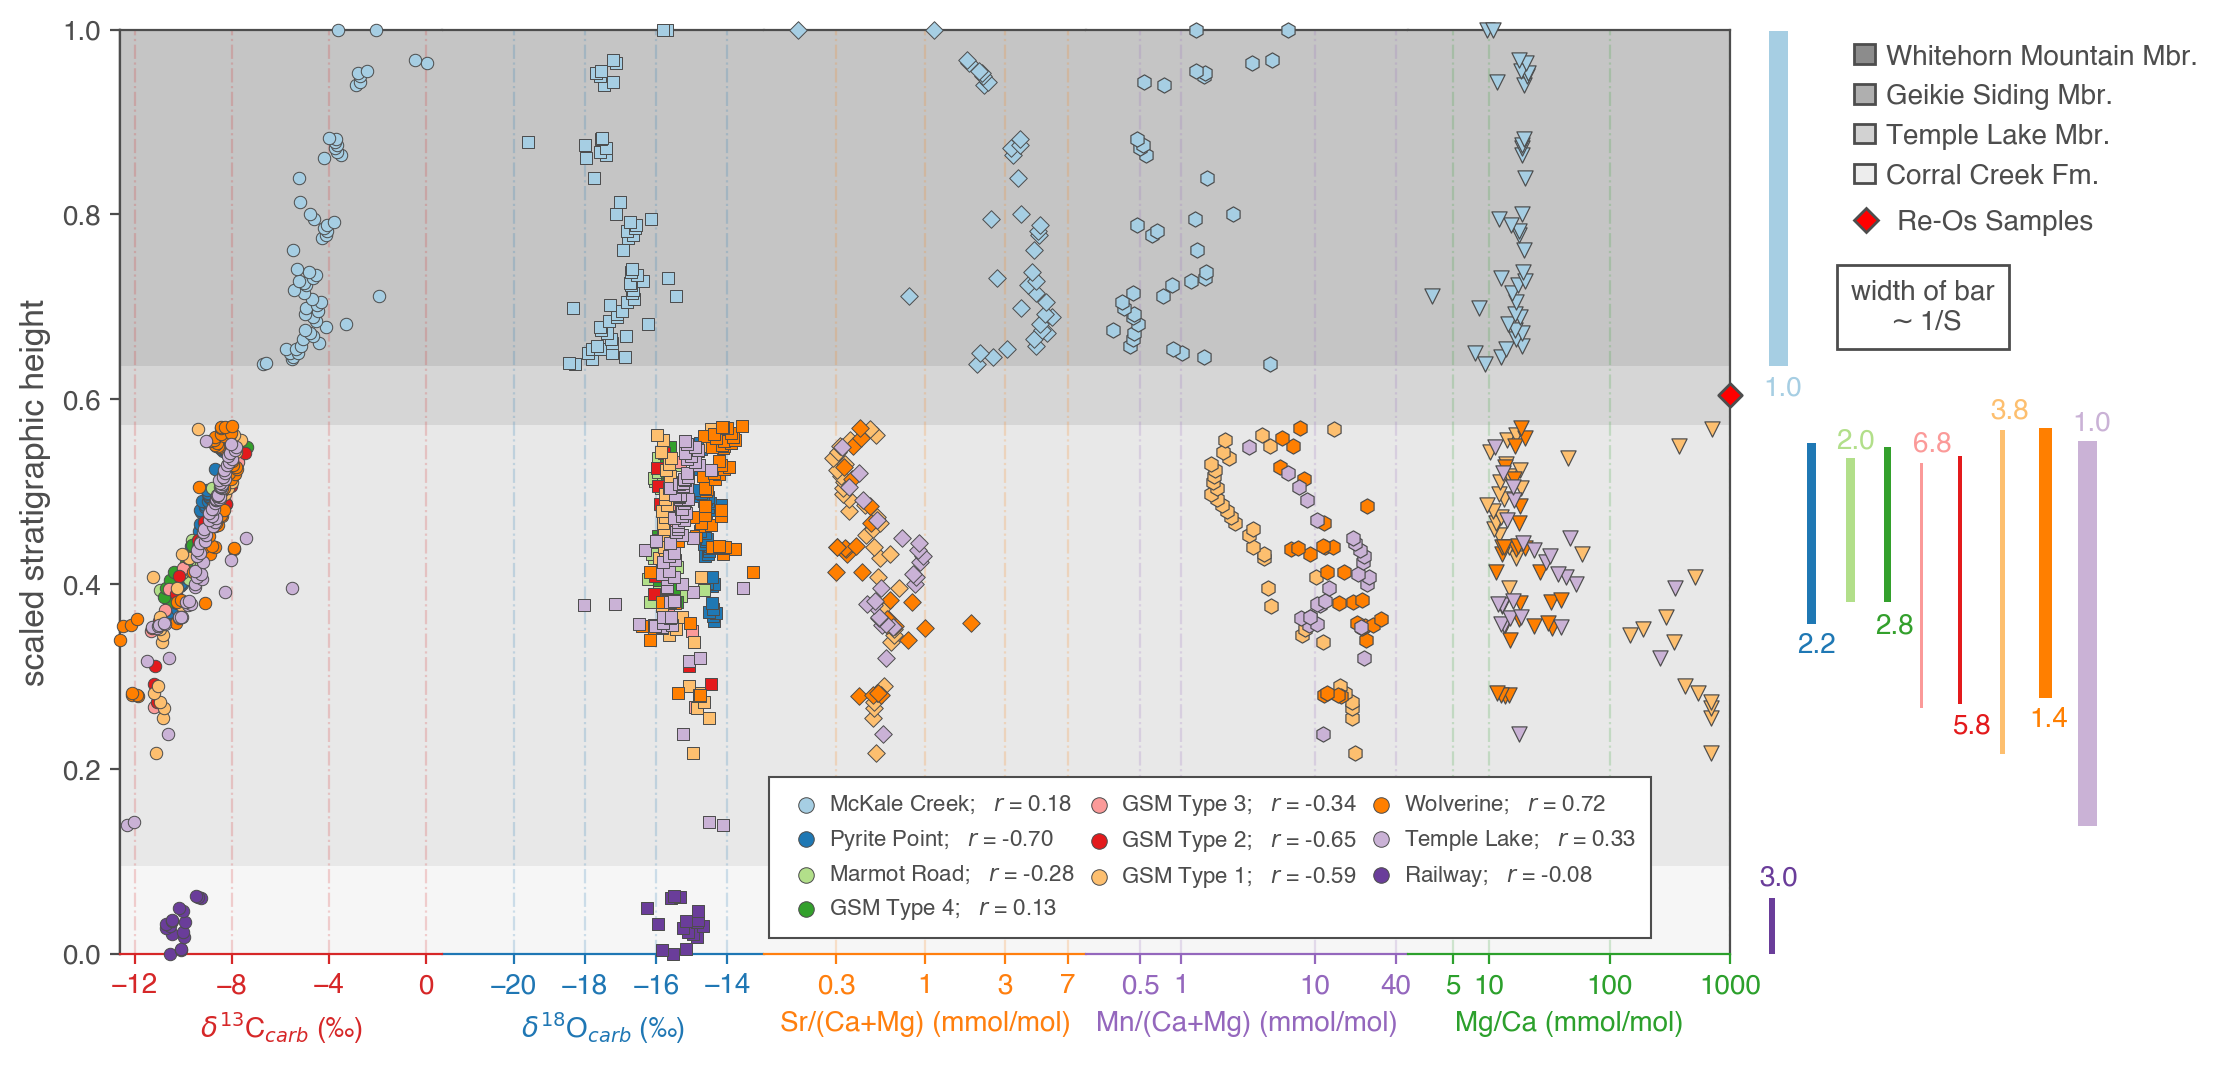

In [40]:
# sns.set_context('paper')

fig,ax = plt.subplot_mosaic(
    """
    FABGHIC
    FABGHIC
    """,width_ratios=[0,.8,.8,.8,.8,.8,1.2],figsize=(13.5,6),sharey=False)#,layout='constrained') # first axis grid was 0.1w
plt.subplots_adjust(wspace=0)

# rects
init = 0
ys = []
pal = sns.color_palette('Paired',n_colors=10).as_hex()
#pal[0] = 'w'
tloc = []
pear = []
spear = []
for idx,((key,val),c) in enumerate(zip(reversed(comp.items()),pal)):
    l = key
    base = val[0]
    scale = val[1]
    sec = val[2]
    y_scaled = scale*sec['sample_height']+base
    sec['sample_height_scaled'] = y_scaled # save as new column
    ys.append(y_scaled.values)
    init += 0.4 
    # geochemistry
    s = 20
    # regression for carbon oxygen
    r,_,_,_,_ = linreg(sec['d18o_carb'],sec['d13c_carb'],type='pearson')
    rho,_,_,_,_ = linreg(sec['d18o_carb'],sec['d13c_carb'],type='spearman')
    #tloc.append(key)
    pear.append(r)
    spear.append(rho)
    print(f'{l}; r = {r:.2f}; rho = {rho:.2f}')
    targs = [sec['d13c_carb'],sec['d18o_carb'],np.log10(sec['Sr_mmol_molCa_Mg']),np.log10(sec['Mn_mmol_molCa_Mg']),np.log10(sec['Mg_mmol_molCa'])]
    ms = ['o','s','D','h','v']
    ss = [20,20,20,30,30]
    for a,t,m,sz in zip(['A','B','G','H','I'],targs,ms,ss):
        sns.scatterplot(x=t,y=y_scaled,ax=ax[a],label=l+f';   $r$ = {r:.2f}',legend=False,edgecolor='.3',facecolor=c,marker=m,alpha=1,s=sz,clip_on=False,zorder=20)
    tloc = 'top' if idx%2==0 else 'bottom'

    if key=='Railway':
        width = draw_rect(0.4,scale,y_scaled,c,ax['C'],tloc='top')
    elif key=='McKale Creek':
        _ = draw_rect(init,scale,y_scaled,c,ax['C'],tloc='bottom')
    else:
        _ = draw_rect(init,scale,y_scaled,c,ax['C'],tloc=tloc)

# get array of all scaled heights
ys = np.concatenate(ys)

# set lims
ax['A'].set_ylim(min(ys),max(ys)) # -32,275
ax['A'].set_xlim(left=min(secs['d13c_carb'])) # -13.5,1
ax['A'].set_xticks([-12,-8,-4,0])
ax['B'].set_xticks([-20,-18,-16,-14])
ax['B'].set_xlim(left=-22)
ax['C'].set_xlim(0,np.ceil(init+width))
#ax['G'].set_xlim(left=np.log10(np.nanmin(secs['Sr_mmol_molCa'])),right=np.log10(np.nanmax(secs['Sr_mmol_molCa']))) # was log10
ax['H'].set_xlim(right=np.log10(np.nanmax(secs['Mn_mmol_molCa_Mg']))) # was log10
ax['I'].set_xlim(right=np.log10(np.nanmax(secs['Mg_mmol_molCa']))) # was log10

#ax['G'].set_xticks(np.linspace(np.log10(np.nanmin(secs['Sr_mmol_molCa'])),np.log10(np.nanmax(secs['Sr_mmol_molCa'])),4))
#ax['G'].set_xlim(1e-1,1e1) # was log10

ax['B'].sharey(ax['A'])
ax['C'].sharey(ax['B'])
#ax['F'].sharey(ax['A'])
ax['G'].sharey(ax['A'])
ax['H'].sharey(ax['A'])
ax['I'].sharey(ax['A'])


# fix ticks
for a,t in zip(['G','H','I'],['Sr_mmol_molCa_Mg','Mn_mmol_molCa_Mg','Mg_mmol_molCa']):
    mmax = max(np.log10(secs[t]))
    mmin = min(np.log10(secs[t]))
    if a=='I':
        ax[a].set_xlim(mmin-0.2,mmax)
    else:
        ax[a].set_xlim(mmin-0.2,mmax+0.2)

    #ax[a].set_xticks(np.linspace(mmin,mmax,4))

# set trace to log scale
ticks_x = FuncFormatter(lambda x, pos: '{0:g}'.format(round(10**x,2)))
ax['G'].xaxis.set_major_formatter(ticks_x)
ax['H'].xaxis.set_major_formatter(ticks_x)
ax['I'].xaxis.set_major_formatter(ticks_x)

cols = ['tab:green','tab:purple','tab:orange','tab:blue','tab:red']
xl = ['Mg/Ca (mmol/mol)','Mn/(Ca+Mg) (mmol/mol)','Sr/(Ca+Mg) (mmol/mol)','$\delta^{18}$O$_{carb}$ (‰)','$\delta^{13}$C$_{carb}$ (‰)']
#xl = ['log$_{10} $'+i for i in xl]
axs = ['I','H','G','B','A']
ax['F'].set_ylabel('scaled stratigraphic height',fontsize=12)
ax['C'].text(0.4,0.7,'width of bar\n$\sim$1/S',transform=ax['C'].transAxes,va='center',ha='center',fontsize=10, # width of bar\n1/$\propto$\nscale factor
             bbox=dict(facecolor='w',edgecolor='.3',boxstyle='square,pad=0.5'))

for a,c,l in zip(axs,cols,xl):
    ax[a].set_xlabel(l,color=c)
    ax[a].xaxis.label.set_color(c)        
    ax[a].tick_params(axis='x', colors=c)
    ax[a].spines['bottom'].set_color(c)      
    ax[a].xaxis.grid(color=c,alpha=0.2)
    ax[a].tick_params(axis='y', which='both',length=0)
    ax[a].set_ylabel(None)
    ax[a].set_yticks([])
    
# legend
leg = ax['A'].legend(loc=3,bbox_to_anchor=(2,0.0125),fontsize=8,framealpha=1,ncol=3,markerscale=1.25,handletextpad=0.01,columnspacing=0.1)
frame = leg.get_frame()
frame.set_edgecolor('.3')
frame.set_linewidth(.75)
frame.set_boxstyle('square')
ax['A'].set_zorder(20000)

# clean up
ax['A'].spines['right'].set_visible(False)
ax['B'].spines[['left','right']].set_visible(False)
ax['G'].spines[['left','right']].set_visible(False)
ax['H'].spines[['left','right']].set_visible(False)
ax['I'].spines['left'].set_visible(False)
#ax['B'].set_yticks([])
ax['C'].axis('off')
ax['F'].set_xticks([])

# unit boundaries
wmm_base = np.floor(min(comp['McKale Creek'][1]*comp['McKale Creek'][2]['sample_height'])+comp['McKale Creek'][0])
tlm_top = np.ceil(max(comp['Wolverine'][1]*comp['Wolverine'][2]['sample_height'])+comp['Wolverine'][0])
g = sns.color_palette('Greys',n_colors=4).as_hex()
#g1 = [colors.to_rgba(i, 0.5) for i in g]
#g1 = colors.ListedColormap(g1, name='alphas').colors
alpha=0.3
for i in ['A','B','G','H','I']:
    ax[i].axhspan(wmm_base,ax['A'].get_ylim()[1],lw=0,color=g[3],zorder=0,alpha=alpha) # wmm
    ax[i].axhspan(0,tlm_top,lw=0,color=g[1],zorder=0,alpha=alpha) # tlm
    ax[i].axhspan(tlm_top,wmm_base,lw=0,color=g[2],zorder=0,alpha=alpha) # gsm
    ax[i].axhspan(ax['A'].get_ylim()[0],0,lw=0,color=g[0],zorder=0,alpha=alpha) # cck
    
el = [Patch(facecolor=colors.to_rgba(g[3], 0.6), edgecolor='.3',label='Whitehorn Mountain Mbr.'),
      Patch(facecolor=colors.to_rgba(g[2], 0.6), edgecolor='.3',label='Geikie Siding Mbr.'),
      Patch(facecolor=colors.to_rgba(g[1], 0.6), edgecolor='.3',label='Temple Lake Mbr.'),
      Patch(facecolor=colors.to_rgba(g[0], 0.6), edgecolor='.3',label='Corral Creek Fm.')]
ax['C'].legend(handles=el,loc=3,bbox_to_anchor=(0.205,0.8),frameon=False,fontsize=10,handletextpad=0.4,markerfirst=True,handlelength=0.75)



# add 607.8 Ma age to side of, was log10
ax['I'].scatter(x=np.log10(1000),y=(wmm_base+tlm_top)/2,marker='D',clip_on=False,zorder=10,edgecolor='.3', # np.nanmax(secs['Mg_mmol_molCa'])
                facecolor='r',label='607.8$\pm$4.7 Ma')
el = [matplotlib.lines.Line2D([0], [0], marker='D', label='Re-Os Samples',mfc='r',lw=0,mec='.3',ms=6)] # '607.8 $\pm$ 4.7 Ma (Re-Os)'
ax['I'].legend(handles=el,loc=3,bbox_to_anchor=(1.26,0.75),frameon=False,fontsize=10,handletextpad=0.1)
ax['H'].set_zorder(10000)
ax['G'].set_zorder(10000)
ax['I'].set_zorder(10000)

#ax['G'].set_xticks([round(i,1) for i in ax['G'].get_xticks()])
ax['G'].set_xticks([np.log10(i) for i in [0.3,1,3,7]]) # sr/ca
ax['H'].set_xticks([np.log10(i) for i in [0.5,1,10,40]]) # mn/ca
ax['I'].set_xticks([np.log10(i) for i in [5,10,100,1000]]) # mg/ca


#fig.savefig(fig_dir+'ofp_comp1.pdf',format='pdf',bbox_inches='tight',transparent=False)

## Version for Exit Seminar

In [137]:
# comp.keys()

In [138]:
# def qp(dtarg):
#     sns.set_context('notebook')
    
#     # Compute global y-limits BEFORE selecting a subset
#     all_scaled_heights = []
#     for key, val in comp.items():
#         base = val[0]
#         scale = val[1]
#         sec = val[2]
#         y_scaled = scale * sec['sample_height'] + base
#         all_scaled_heights.append(y_scaled.values)
    
#     global_y_min = np.min(np.concatenate(all_scaled_heights))
#     global_y_max = np.max(np.concatenate(all_scaled_heights))
    
#     # Select one subset at a time (e.g., 'Railway')
#     pal = sns.color_palette('Paired', n_colors=10).as_hex()
#     color_map = {key: c for key, c in zip(reversed(comp.keys()), pal)}
#     sub_comp = {dtarg: comp[dtarg]}
    
#     # Create figure and subplots
#     fig, ax = plt.subplot_mosaic(
#         """
#         FABGHIC
#         FABGHIC
#         """, width_ratios=[0, .8, .8, .8, .8, .8, 1.2], figsize=(13.5, 6), sharey=False)
    
#     #plt.subplots_adjust(wspace=0)
    
#     # Initialize variables
#     ys = []
#     tloc = []
#     pear = []
#     spear = []
    
#     # PLOTTING LOGIC
#     for idx, ((key, val), c) in enumerate(zip(reversed(sub_comp.items()), pal)):
#         c = color_map[key]  # Get the correct color
#         base = val[0]
#         scale = val[1]
#         sec = val[2]
#         y_scaled = scale * sec['sample_height'] + base
#         sec['sample_height_scaled'] = y_scaled  # save as new column
#         ys.append(y_scaled.values)
    
#         # Regression analysis
#         r, _, _, _, _ = linreg(sec['d18o_carb'], sec['d13c_carb'], type='pearson')
#         rho, _, _, _, _ = linreg(sec['d18o_carb'], sec['d13c_carb'], type='spearman')
#         pear.append(r)
#         spear.append(rho)
    
#         # Define variables for scatter plots
#         targs = [
#             sec['d13c_carb'],
#             sec['d18o_carb'],
#             np.log10(sec['Sr_mmol_molCa_Mg']),
#             np.log10(sec['Mn_mmol_molCa_Mg']),
#             np.log10(sec['Mg_mmol_molCa'])
#         ]
#         ms = ['o', 's', 'D', 'h', 'v']
#         ss = [20, 20, 20, 30, 30]
    
#         # Scatter plots
#         for a, t, m, sz in zip(['A', 'B', 'G', 'H', 'I'], targs, ms, ss):
#             sns.scatterplot(x=t, y=y_scaled, ax=ax[a], label=key,
#                             legend=False, edgecolor='.3', facecolor=c,
#                             marker=m, alpha=1, s=sz, clip_on=False, zorder=20)
    
#     # Set **consistent** y-limits across all subplots
#     for subplot in ['A', 'B', 'C', 'G', 'H', 'I']:
#         ax[subplot].set_ylim(global_y_min, global_y_max)
    
#     # Set x-limits for individual subplots
#     ax['A'].set_xlim(left=min(secs['d13c_carb']))
#     ax['A'].set_xticks([-12, -8, -4, 0])
#     ax['B'].set_xticks([-20, -18, -16, -14])
#     ax['B'].set_xlim(left=-22)
#     ax['C'].set_xlim(0, np.ceil(len(sub_comp)))
    
#     ax['H'].set_xlim(right=np.log10(np.nanmax(secs['Mn_mmol_molCa_Mg'])))
#     ax['I'].set_xlim(right=np.log10(np.nanmax(secs['Mg_mmol_molCa'])))
    
#     # Share y-axes across plots
#     ax['B'].sharey(ax['A'])
#     ax['C'].sharey(ax['B'])
#     ax['G'].sharey(ax['A'])
#     ax['H'].sharey(ax['A'])
#     ax['I'].sharey(ax['A'])
    
#     # Fix ticks for log-scale data
#     for a, t in zip(['G', 'H', 'I'], ['Sr_mmol_molCa_Mg', 'Mn_mmol_molCa_Mg', 'Mg_mmol_molCa']):
#         mmax = max(np.log10(secs[t]))
#         mmin = min(np.log10(secs[t]))
#         ax[a].set_xlim(mmin - 0.2, mmax + 0.2)
    
#     ticks_x = FuncFormatter(lambda x, pos: '{0:g}'.format(round(10 ** x, 2)))
#     for a in ['G', 'H', 'I']:
#         ax[a].xaxis.set_major_formatter(ticks_x)
    
#     # Axis labels and formatting
#     cols = ['tab:green', 'tab:purple', 'tab:orange', 'tab:blue', 'tab:red']
#     xl = ['Mg / Ca\n(mmol / mol)', 'Mn / (Ca+Mg)\n(mmol / mol)', 'Sr / (Ca+Mg)\n(mmol / mol)',
#           '$\delta^{18}$O$_{carb}$ (‰)', '$\delta^{13}$C$_{carb}$ (‰)']
    
#     axs = ['I', 'H', 'G', 'B', 'A']
#     ax['F'].set_ylabel('scaled stratigraphic height', fontsize=12)
    
#     for a, c, l in zip(axs, cols, xl):
#         ax[a].set_xlabel(l, color=c)
#         ax[a].xaxis.label.set_color(c)
#         ax[a].tick_params(axis='x', colors=c)
#         ax[a].spines['bottom'].set_color(c)
#         ax[a].xaxis.grid(color=c, alpha=0.2)
#         ax[a].tick_params(axis='y', which='both', length=0)
#         ax[a].set_ylabel(None)
#         ax[a].set_yticks([])
    
#     # Set x-ticks for log plots
#     ax['G'].set_xticks([np.log10(i) for i in [0.3, 1, 3, 7]])
#     ax['H'].set_xticks([np.log10(i) for i in [0.5, 1, 10, 40]])
#     ax['I'].set_xticks([np.log10(i) for i in [5, 10, 100, 1000]])
    
#     # clean up
#     #ax['A'].spines['right'].set_visible(False)
#     #ax['B'].spines[['left','right']].set_visible(False)
#     #ax['G'].spines[['left','right']].set_visible(False)
#     #ax['H'].spines[['left','right']].set_visible(False)
#     #ax['I'].spines['left'].set_visible(False)
#     #ax['B'].set_yticks([])
#     ax['C'].axis('off')
#     ax['F'].set_xticks([]);
    
#     # unit boundaries
#     wmm_base = np.floor(min(comp['McKale Creek'][1]*comp['McKale Creek'][2]['sample_height'])+comp['McKale Creek'][0])
#     tlm_top = np.ceil(max(comp['Wolverine'][1]*comp['Wolverine'][2]['sample_height'])+comp['Wolverine'][0])
#     g = sns.color_palette('Greys',n_colors=4).as_hex()
#     #g1 = [colors.to_rgba(i, 0.5) for i in g]
#     #g1 = colors.ListedColormap(g1, name='alphas').colors
#     alpha=0.3
#     for i in ['A','B','G','H','I']:
#         ax[i].axhspan(wmm_base,ax['A'].get_ylim()[1],lw=0,color=g[3],zorder=0,alpha=alpha) # wmm
#         ax[i].axhspan(0,tlm_top,lw=0,color=g[1],zorder=0,alpha=alpha) # tlm
#         ax[i].axhspan(tlm_top,wmm_base,lw=0,color=g[2],zorder=0,alpha=alpha) # gsm
#         ax[i].axhspan(ax['A'].get_ylim()[0],0,lw=0,color=g[0],zorder=0,alpha=alpha) # cck
        
#     el = [Patch(facecolor=colors.to_rgba(g[3], 0.6), edgecolor='.3',label='Whitehorn Mountain Mbr.'),
#           Patch(facecolor=colors.to_rgba(g[2], 0.6), edgecolor='.3',label='Geikie Siding Mbr.'),
#           Patch(facecolor=colors.to_rgba(g[1], 0.6), edgecolor='.3',label='Temple Lake Mbr.'),
#           Patch(facecolor=colors.to_rgba(g[0], 0.6), edgecolor='.3',label='Corral Creek Fm.')]
#     ax['C'].legend(handles=el,loc=3,bbox_to_anchor=(-0.1,0.8),frameon=False,fontsize=10,handletextpad=0.4,markerfirst=True,handlelength=0.75)

#     return fig

# fig_dir = '/Users/cvanwieren/Library/CloudStorage/Dropbox/GitHub/Talks/UVic_Department_Talks/Exit Seminar/img/'

In [117]:
# for k in comp.keys():
#     fig = qp(dtarg=k)
#     fig.savefig(fig_dir+f'ofp_strat/{k}.png',format='png',dpi=300,bbox_inches='tight',transparent=True)
#     plt.close()

In [135]:
def qp(dtarg, fig=None, ax=None, first_iteration=False):
    sns.set_context('notebook')

    # Compute global y-limits BEFORE selecting a subset
    all_scaled_heights = []
    for key, val in comp.items():
        base = val[0]
        scale = val[1]
        sec = val[2]
        y_scaled = scale * sec['sample_height'] + base
        all_scaled_heights.append(y_scaled.values)

    global_y_min = np.min(np.concatenate(all_scaled_heights))
    global_y_max = np.max(np.concatenate(all_scaled_heights))

    # Compute global x-limits for all variables BEFORE plotting
    global_xlims = {
        'A': (min(secs['d13c_carb']), max(secs['d13c_carb'])),
        'B': (-22, max(secs['d18o_carb'])),
        'G': (np.log10(0.3), np.log10(7)),  # Sr/Ca
        'H': (np.log10(0.5), np.log10(40)),  # Mn/Ca
        'I': (np.log10(5), np.log10(1000)),  # Mg/Ca
    }

    # Store color mapping for consistency
    pal = sns.color_palette('Paired', n_colors=len(comp)).as_hex()
    color_map = {key: c for key, c in zip(reversed(comp.keys()), pal)}

    # Select one subset at a time
    sub_comp = {dtarg: comp[dtarg]}

    # If no figure exists, create a new one (first iteration)
    if fig is None or ax is None:
        fig, ax = plt.subplot_mosaic(
            """
            FABGHIC
            FABGHIC
            """, width_ratios=[0, .8, .8, .8, .8, .8, 1.2], figsize=(13.5, 6), sharey=False)

    # PLOTTING LOGIC (Building up)
    for idx, (key, val) in enumerate(sub_comp.items()):
        c = color_map[key]  # Get the correct color
        base = val[0]
        scale = val[1]
        sec = val[2]
        y_scaled = scale * sec['sample_height'] + base
        sec['sample_height_scaled'] = y_scaled  # Save as new column

        # Define variables for scatter plots
        targs = [
            sec['d13c_carb'],
            sec['d18o_carb'],
            np.log10(sec['Sr_mmol_molCa_Mg']),
            np.log10(sec['Mn_mmol_molCa_Mg']),
            np.log10(sec['Mg_mmol_molCa'])
        ]
        ms = ['o', 's', 'D', 'h', 'v']
        ss = [20, 20, 20, 30, 30]

        # Scatter plots (adding to the same figure)
        for a, t, m, sz in zip(['A', 'B', 'G', 'H', 'I'], targs, ms, ss):
            sns.scatterplot(x=t, y=y_scaled, ax=ax[a], label=key,
                            legend=False, edgecolor='.3', facecolor=c,
                            marker=m, alpha=1, s=sz, clip_on=False, zorder=20)

    # Set **consistent** y-limits across all subplots
    for subplot in ['A', 'B', 'C', 'G', 'H', 'I']:
        ax[subplot].set_ylim(global_y_min, global_y_max)

    # Ensure x-limits are set from the start
    for subplot, (xmin, xmax) in global_xlims.items():
        ax[subplot].set_xlim(xmin, xmax)

    # Add unit boundaries **ONLY on the first iteration**
    if first_iteration:
        wmm_base = np.floor(min(comp['McKale Creek'][1] * comp['McKale Creek'][2]['sample_height']) + comp['McKale Creek'][0])
        tlm_top = np.ceil(max(comp['Wolverine'][1] * comp['Wolverine'][2]['sample_height']) + comp['Wolverine'][0])
        g = sns.color_palette('Greys', n_colors=4).as_hex()
        alpha = 0.3

        for i in ['A', 'B', 'G', 'H', 'I']:
            ax[i].axhspan(wmm_base, global_y_max, lw=0, color=g[3], zorder=0, alpha=alpha)  # Whitehorn Mountain Mbr.
            ax[i].axhspan(0, tlm_top, lw=0, color=g[1], zorder=0, alpha=alpha)  # Temple Lake Mbr.
            ax[i].axhspan(tlm_top, wmm_base, lw=0, color=g[2], zorder=0, alpha=alpha)  # Geikie Siding Mbr.
            ax[i].axhspan(global_y_min, 0, lw=0, color=g[0], zorder=0, alpha=alpha)  # Corral Creek Fm.

        # Add legend only once
        el = [
            Patch(facecolor=g[3], edgecolor='.3', label='Whitehorn Mountain Mbr.'),
            Patch(facecolor=g[2], edgecolor='.3', label='Geikie Siding Mbr.'),
            Patch(facecolor=g[1], edgecolor='.3', label='Temple Lake Mbr.'),
            Patch(facecolor=g[0], edgecolor='.3', label='Corral Creek Fm.')
        ]
        ax['C'].legend(handles=el, loc=3, bbox_to_anchor=(-0.1, 0.8), frameon=False, fontsize=10, handletextpad=0.4, markerfirst=True, handlelength=0.75)

    # format
    # Set x-limits for individual subplots
    ax['A'].set_xlim(left=min(secs['d13c_carb']))
    ax['A'].set_xticks([-12, -8, -4, 0])
    ax['B'].set_xticks([-20, -18, -16, -14])
    ax['B'].set_xlim(left=-22)
    ax['C'].set_xlim(0, np.ceil(len(sub_comp)))
    
    ax['H'].set_xlim(right=np.log10(np.nanmax(secs['Mn_mmol_molCa_Mg'])))
    ax['I'].set_xlim(right=np.log10(np.nanmax(secs['Mg_mmol_molCa'])))
    
    # Share y-axes across plots
    ax['B'].sharey(ax['A'])
    ax['C'].sharey(ax['B'])
    ax['G'].sharey(ax['A'])
    ax['H'].sharey(ax['A'])
    ax['I'].sharey(ax['A'])

    # Fix ticks for log-scale data
    for a, t in zip(['G', 'H', 'I'], ['Sr_mmol_molCa_Mg', 'Mn_mmol_molCa_Mg', 'Mg_mmol_molCa']):
        mmax = max(np.log10(secs[t]))
        mmin = min(np.log10(secs[t]))
        ax[a].set_xlim(mmin - 0.2, mmax + 0.2)
    
    ticks_x = FuncFormatter(lambda x, pos: '{0:g}'.format(round(10 ** x, 2)))
    for a in ['G', 'H', 'I']:
        ax[a].xaxis.set_major_formatter(ticks_x)
    
    # Axis labels and formatting
    cols = ['tab:green', 'tab:purple', 'tab:orange', 'tab:blue', 'tab:red']
    xl = ['Mg / Ca\n(mmol / mol)', 'Mn / (Ca+Mg)\n(mmol / mol)', 'Sr / (Ca+Mg)\n(mmol / mol)',
          '$\delta^{18}$O$_{carb}$ (‰)', '$\delta^{13}$C$_{carb}$ (‰)']
    
    axs = ['I', 'H', 'G', 'B', 'A']
    ax['F'].set_ylabel('scaled stratigraphic height', fontsize=12)
    
    for a, c, l in zip(axs, cols, xl):
        ax[a].set_xlabel(l, color=c)
        ax[a].xaxis.label.set_color(c)
        ax[a].tick_params(axis='x', colors=c)
        ax[a].spines['bottom'].set_color(c)
        ax[a].xaxis.grid(color=c, alpha=0.2)
        ax[a].tick_params(axis='y', which='both', length=0)
        ax[a].set_ylabel(None)
        ax[a].set_yticks([])
    
    # Set x-ticks for log plots
    ax['G'].set_xticks([np.log10(i) for i in [0.3, 1, 3, 7]])
    ax['H'].set_xticks([np.log10(i) for i in [0.5, 1, 10, 40]])
    ax['I'].set_xticks([np.log10(i) for i in [5, 10, 100, 1000]])
    
    # clean up
    #ax['A'].spines['right'].set_visible(False)
    #ax['B'].spines[['left','right']].set_visible(False)
    #ax['G'].spines[['left','right']].set_visible(False)
    #ax['H'].spines[['left','right']].set_visible(False)
    #ax['I'].spines['left'].set_visible(False)
    #ax['B'].set_yticks([])
    ax['C'].axis('off')
    ax['F'].set_xticks([]);

    return fig, ax  # Return the same figure for reuse

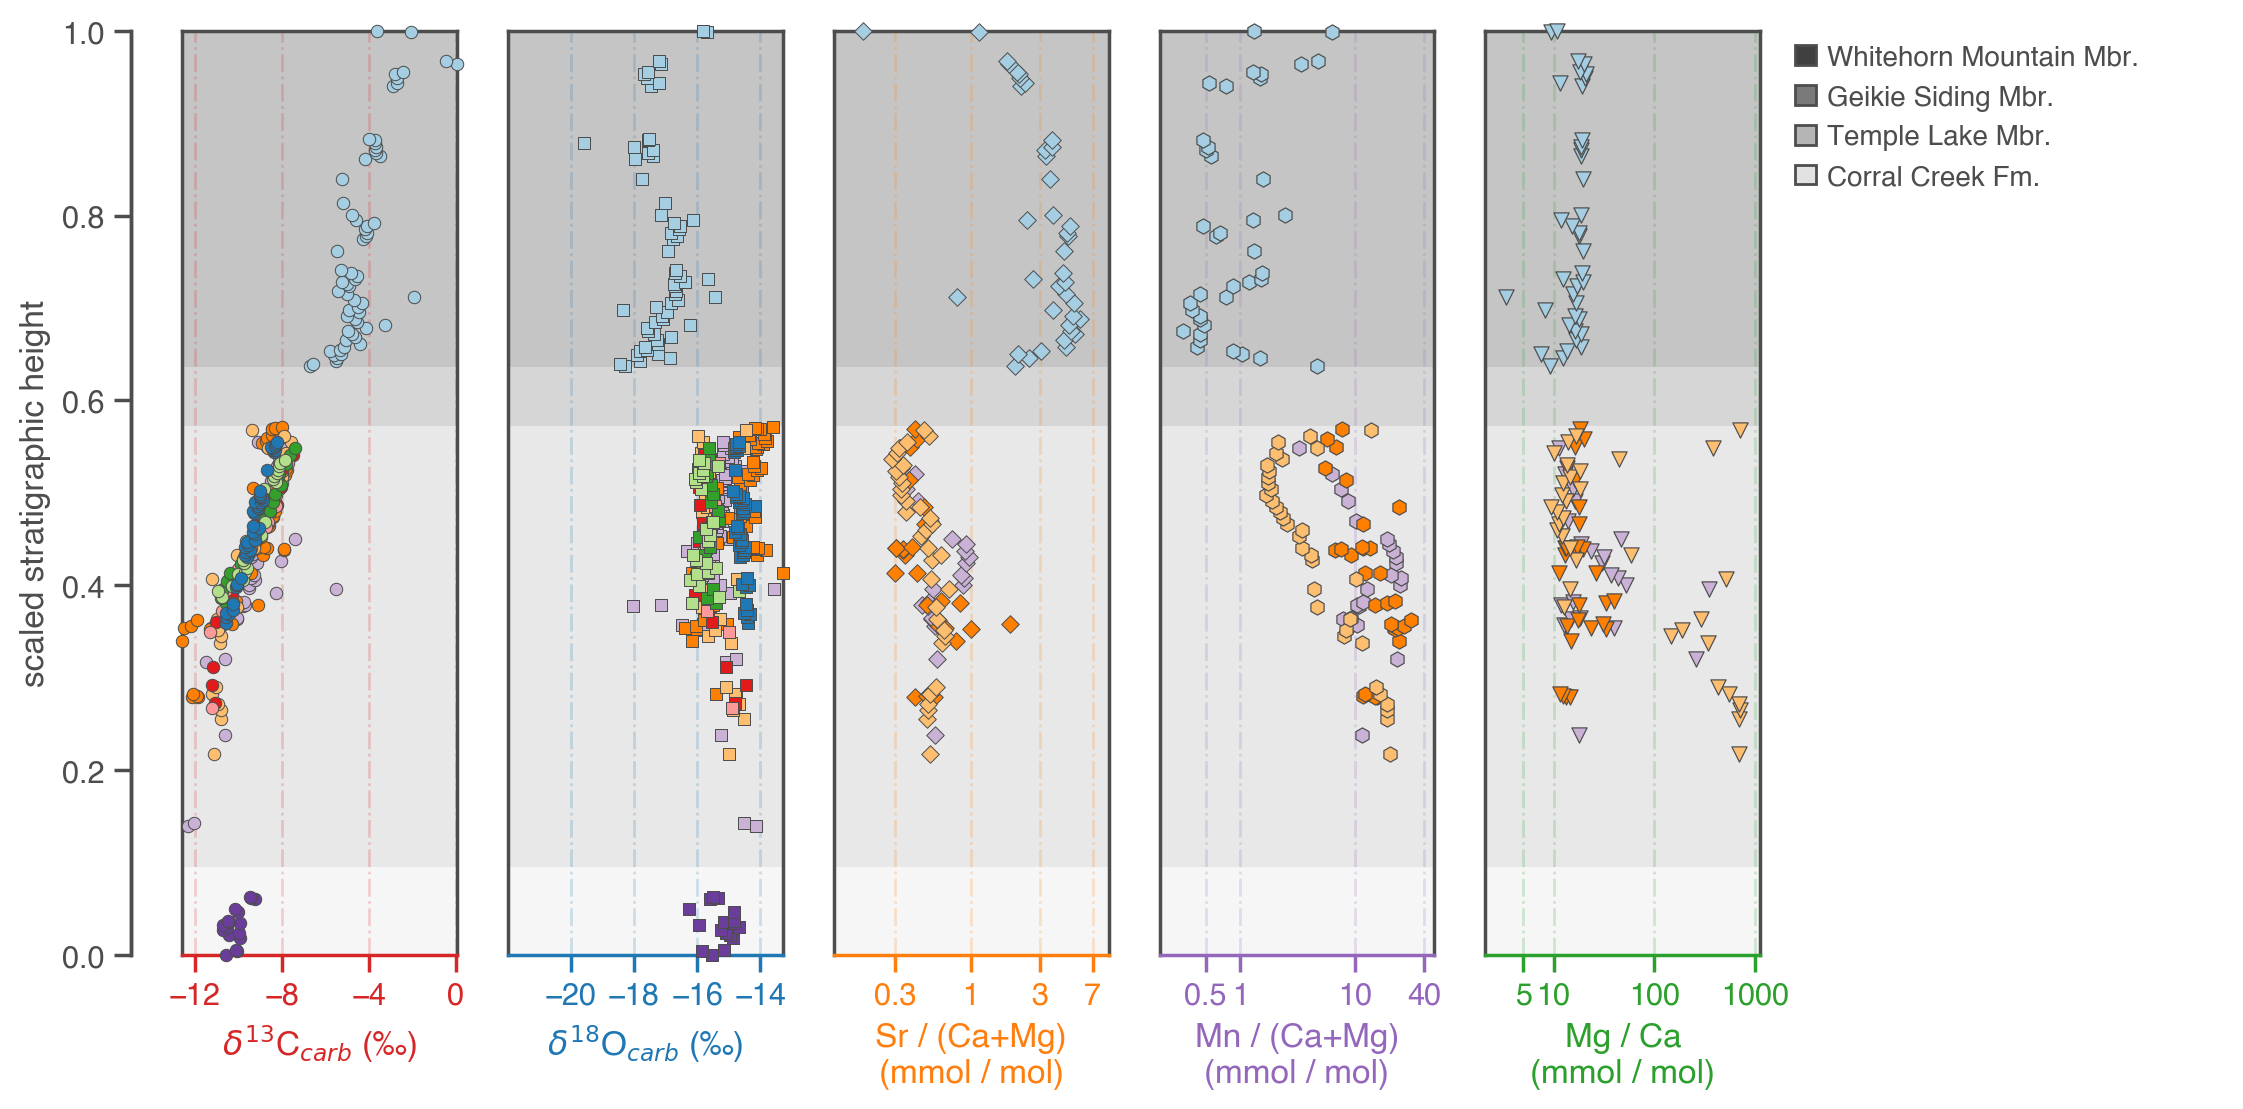

In [136]:
fig_dir = '/Users/cvanwieren/Library/CloudStorage/Dropbox/GitHub/Talks/UVic_Department_Talks/Exit Seminar/img/ofp_strat/'

# Define the order in which sections should be added
plot_order = ['Railway', 'Temple Lake', 'Wolverine', 'GSM Type 1', 'GSM Type 2',
              'GSM Type 3', 'GSM Type 4', 'Marmot Road', 'Pyrite Point', 'McKale Creek']

# Initialize an empty figure
fig, ax = None, None

# Build up the plot incrementally
for i, section in enumerate(plot_order):
    first_iteration = (i == 0)  # True only for the first item
    fig, ax = qp(dtarg=section, fig=fig, ax=ax, first_iteration=first_iteration)
    fig.savefig(fig_dir + f'{i:02d}_{section}.png', format='png', dpi=300, bbox_inches='tight', transparent=True)

## Table of Correlation Coefficients

In [ ]:
labs = list(comp.keys())[::-1]
d = dict(zip(labs,pear))
d

In [ ]:
df = pd.DataFrame(columns=['Member','Locality','Correlation Coefficient ($r$)'])
df['Member'] = ['WMM','TLM','','','','','','','']
df['Locality'] = labs[:-1]
df['Correlation Coefficient ($r$)'] = [str(round(i,2)) for i in list(d.values())[:-1]]
df

In [ ]:
s = df.style.hide(axis='index')
print(s.to_latex(
    convert_css=True, hrules=True, position_float='centering',
    caption='caption',label='table:locs',position='htb!'))

In [ ]:
np.mean([abs(i) for i in list(d.values())[1:-1]])

## Compile all scaled ofp data into one dataframe

In [ ]:
# remake comp with new dataframes that have scaled height
# 'label':(base,scale factor,data)
# scaled based on hinge of nadir to rising arm where possible
comp = {'Railway':[-30,3,C9_sec],                             # done
       'Temple Lake':[max(C9_sec['sample_height']),1,C8_sec], # done
       'Wolverine':[-85,1.45,C13_sec],                        # done
       'GSM Type 1':[-490,3.8,C1_sec_below_unf1],             # done
       'GSM Type 2':[1265,-5.8,C1_sec_above],                 # done
       'GSM Type 3':[130,-6.8,C1_sec_below_unf2],             # done
       'GSM Type 4':[85,2.8,C2_sec],                          # done
       'Marmot Road':[85,2,C3_sec],                           # done
       'Pyrite Point':[40,2.2,C5_sec],                        # done
       'McKale Creek':[0,1,C16_sec]}                          # done


In [ ]:
ofp_shur = pd.concat([val[2] for key,val in comp.items()]).reset_index(drop=True)

# save to excel
ofp_shur.to_csv('/Users/cvanwieren/Library/CloudStorage/Dropbox/GitHub/vanWieren_OFP_PrecRes/data/sections/ofp_shur.csv')

# check
# fig,ax = plt.subplots(figsize=(3,8))
# sns.scatterplot(data=ofp_shur,x='d13c_carb',y='sample_height_scaled')

In [ ]:
g = sns.color_palette('Greys',n_colors=4).as_hex()
g = [colors.to_rgba(i, .7) for i in g]

In [ ]:
g = sns.color_palette('RdBu',n_colors=4).as_hex()
g = [colors.to_rgba(i, .2) for i in g]
a = colors.ListedColormap(g, name='alphas')
a.colors

## Combined correlation for sections not separated by location

In [ ]:
rt,_,_,_,_ = linreg(secs['d18o_carb'],secs['d13c_carb'],type='pearson')
rhot,_,_,_,_ = linreg(secs['d18o_carb'],secs['d13c_carb'],type='spearman')

print(f'r = {rt:.2f}; rho = {rhot:.2f}')

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(4,6))
t = 'Li_umol_molCa'
s = ax.scatter(x=ofp_shur['d13c_carb'],y=ofp_shur['sample_height_scaled'],c=np.log10(ofp_shur[t]),cmap='RdBu_r')
plt.colorbar(s,label=f'{t[:2]}/Ca ({t[3]}mol/mol')
ax.grid()

In [ ]:
ofp_shur.columns

In [ ]:
fig,ax = plt.subplots(figsize=(4.5,6))
ax.grid()
sns.scatterplot(x=ofp_shur['Sr_mmol_molCa'],y=ofp_shur['sample_height_scaled'],edgecolor='none',s=60,hue=ofp_shur['index'])
#ticks_x = FuncFormatter(lambda x, pos: '{0:g}'.format(round(10**x,2)))
#ax.xaxis.set_major_formatter(ticks_x)
#t = np.linspace(np.log10(0.25),np.log10(30),6)
#t1 = np.logspace(t[0],t[-1],dtype='int')
#ax.set_xticks(t);


In [ ]:
np.logspace(0,1,10,dtype='int')

In [ ]:
t = np.linspace(np.log10(0.25),np.log10(30),6)


In [ ]:
10**1

In [ ]:
fig,ax = plt.subplots(figsize=(4.5,4))
ax.grid()
sns.scatterplot(x=np.log10(ofp_shur['Mn_mmol_molCa']),y=np.log10(ofp_shur['Sr_mmol_molCa']),hue=ofp_shur['sample_height_scaled'],edgecolor='none',s=60,palette='viridis')
ticks_x = FuncFormatter(lambda x, pos: '{0:g}'.format(round(10**x,2)))
ax.xaxis.set_major_formatter(ticks_x)
ax.yaxis.set_major_formatter(ticks_x)



In [ ]:
temp = secs[secs['index']=='Temple Lake'].reset_index(drop=True)
temp1 = temp[(temp['d18o_carb']>-17)]#&(temp['d18o_carb']<-14.25)]
r1,_,_,_,_ = linreg(temp['d18o_carb'],temp['d13c_carb'],type='spearman',rnd=3)
r,_,_,_,_ = linreg(temp['d18o_carb'],temp['d13c_carb'],type='pearson',rnd=3)

plt.scatter(temp1['d18o_carb'],temp1['d13c_carb'])
plt.scatter(temp['d18o_carb'],temp['d13c_carb'],facecolor='none',edgecolor='r',lw=0.5)

plt.title(f'pearson r$_{{all}}$ = {r}\n spearman r$_{{subset}}$ = {r1}');